<a href="https://colab.research.google.com/github/mlabonne/how-to-data-science/blob/main/Improve_ChatGPT_with_Knowledge_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improve ChatGPT with Knowledge Graphs

❤️ Created by [@maximelabonne](https://twitter.com/maximelabonne).

In [ ]:
!pip install -q openai langchain

In [ ]:
import os
import openai

os.environ['OPENAI_API_KEY'] = "your OpenAI key"
openai.api_key = os.environ['OPENAI_API_KEY']

question = "When did apple announced the Vision Pro?"
completion = openai.ChatCompletion.create(model="gpt-3.5-turbo",
                                          temperature=0,
                                          messages=[{"role": "user",
                                                     "content": question}])
print(completion["choices"][0]["message"]["content"])

As an AI language model, I do not have access to current events or real-time information. However, as of my last training data, Apple has not announced any product called "Vision Pro." It is possible that this product does not exist or has not been announced yet.


In [ ]:
from langchain.llms import OpenAI
from langchain.indexes import GraphIndexCreator
from langchain.chains import GraphQAChain
from langchain.prompts import PromptTemplate

text = "Apple announced the Vision Pro in 2023."

index_creator = GraphIndexCreator(llm=OpenAI(temperature=0))
graph = index_creator.from_text(text)
graph.get_triples()

[('Apple', 'Vision Pro', 'announced'),
 ('Vision Pro', '2023', 'was announced in')]

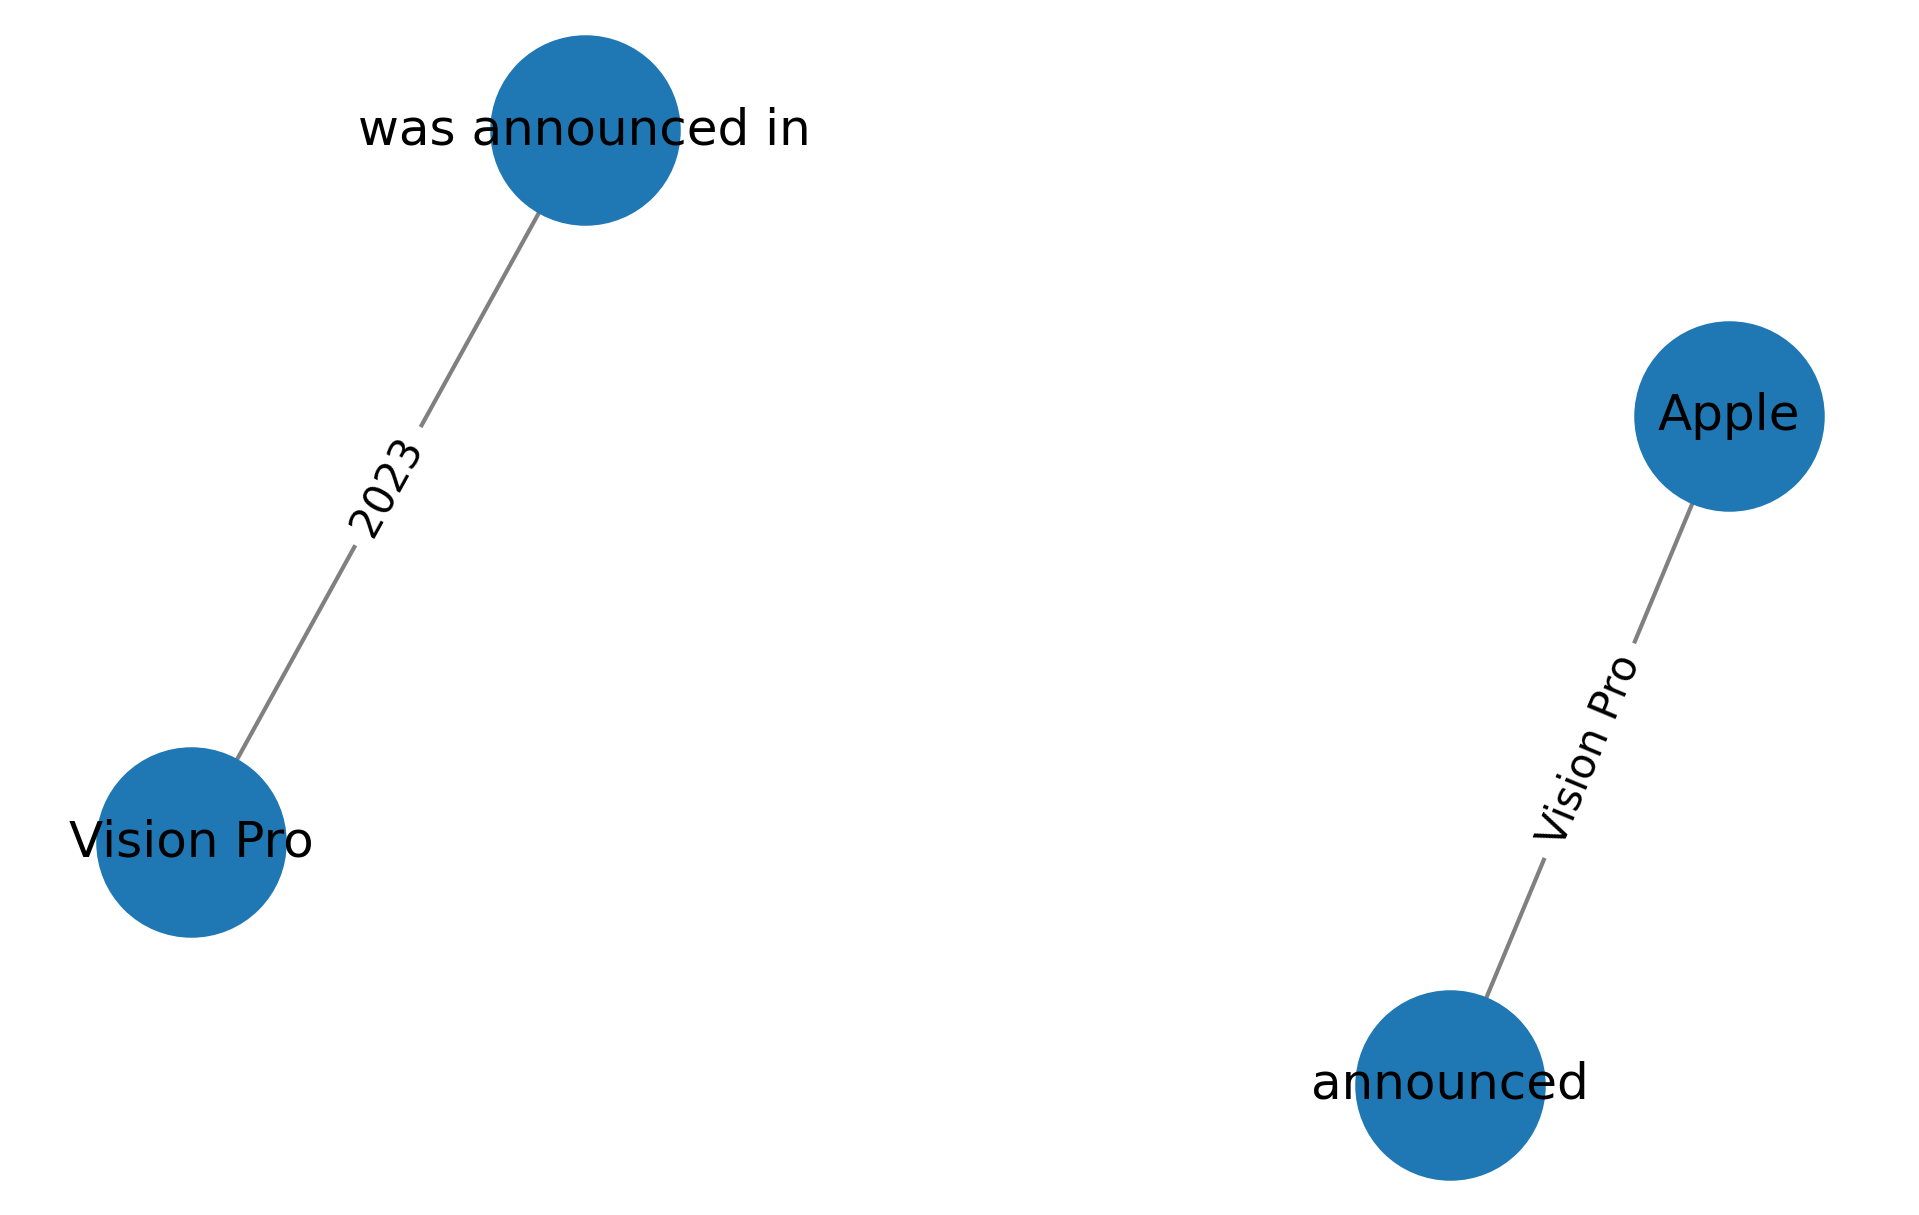

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()
G.add_edges_from((source, target, {'relation': relation}) for source, relation, target in graph.get_triples())

# Plot the graph
plt.figure(figsize=(8,5), dpi=300)
pos = nx.spring_layout(G, k=3, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.axis('off')
plt.show()

In [ ]:
chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph, verbose=True)
chain.run(question)



> Entering new GraphQAChain chain...
Entities Extracted:
 Apple, Vision Pro
Full Context:
Apple announced Vision ProVision Pro was announced in 2023

> Finished chain.


' Apple announced Vision Pro in 2023.'

In [ ]:
from langchain.graphs.networkx_graph import KnowledgeTriple

# Knowledge graph
kg = [
    ('Apple', 'is', 'Company'),
    ('Apple', 'created', 'iMac'),
    ('Apple', 'created', 'iPhone'),
    ('Apple', 'created', 'Apple Watch'),
    ('Apple', 'created', 'Vision Pro'),

    ('Apple', 'developed', 'macOS'),
    ('Apple', 'developed', 'iOS'),
    ('Apple', 'developed', 'watchOS'),

    ('Apple', 'is located in', 'USA'),
    ('Steve Jobs', 'co-founded', 'Apple'),
    ('Steve Wozniak', 'co-founded', 'Apple'),
    ('Tim Cook', 'is the CEO of', 'Apple'),

    ('iOS', 'runs on', 'iPhone'),
    ('macOS', 'runs on', 'iMac'),
    ('watchOS', 'runs on', 'Apple Watch'),

    ('Apple', 'was founded in', '1976'),
    ('Apple', 'owns', 'App Store'),
    ('App Store', 'sells', 'iOS apps'),

    ('iPhone', 'announced in', '2007'),
    ('iMac', 'announced in', '1998'),
    ('Apple Watch', 'announced in', '2014'),
    ('Vision Pro', 'announced in', '2023'),
]

graph = index_creator.from_text('')
for (node1, relation, node2) in kg:
    graph.add_triple(KnowledgeTriple(node1, relation, node2))

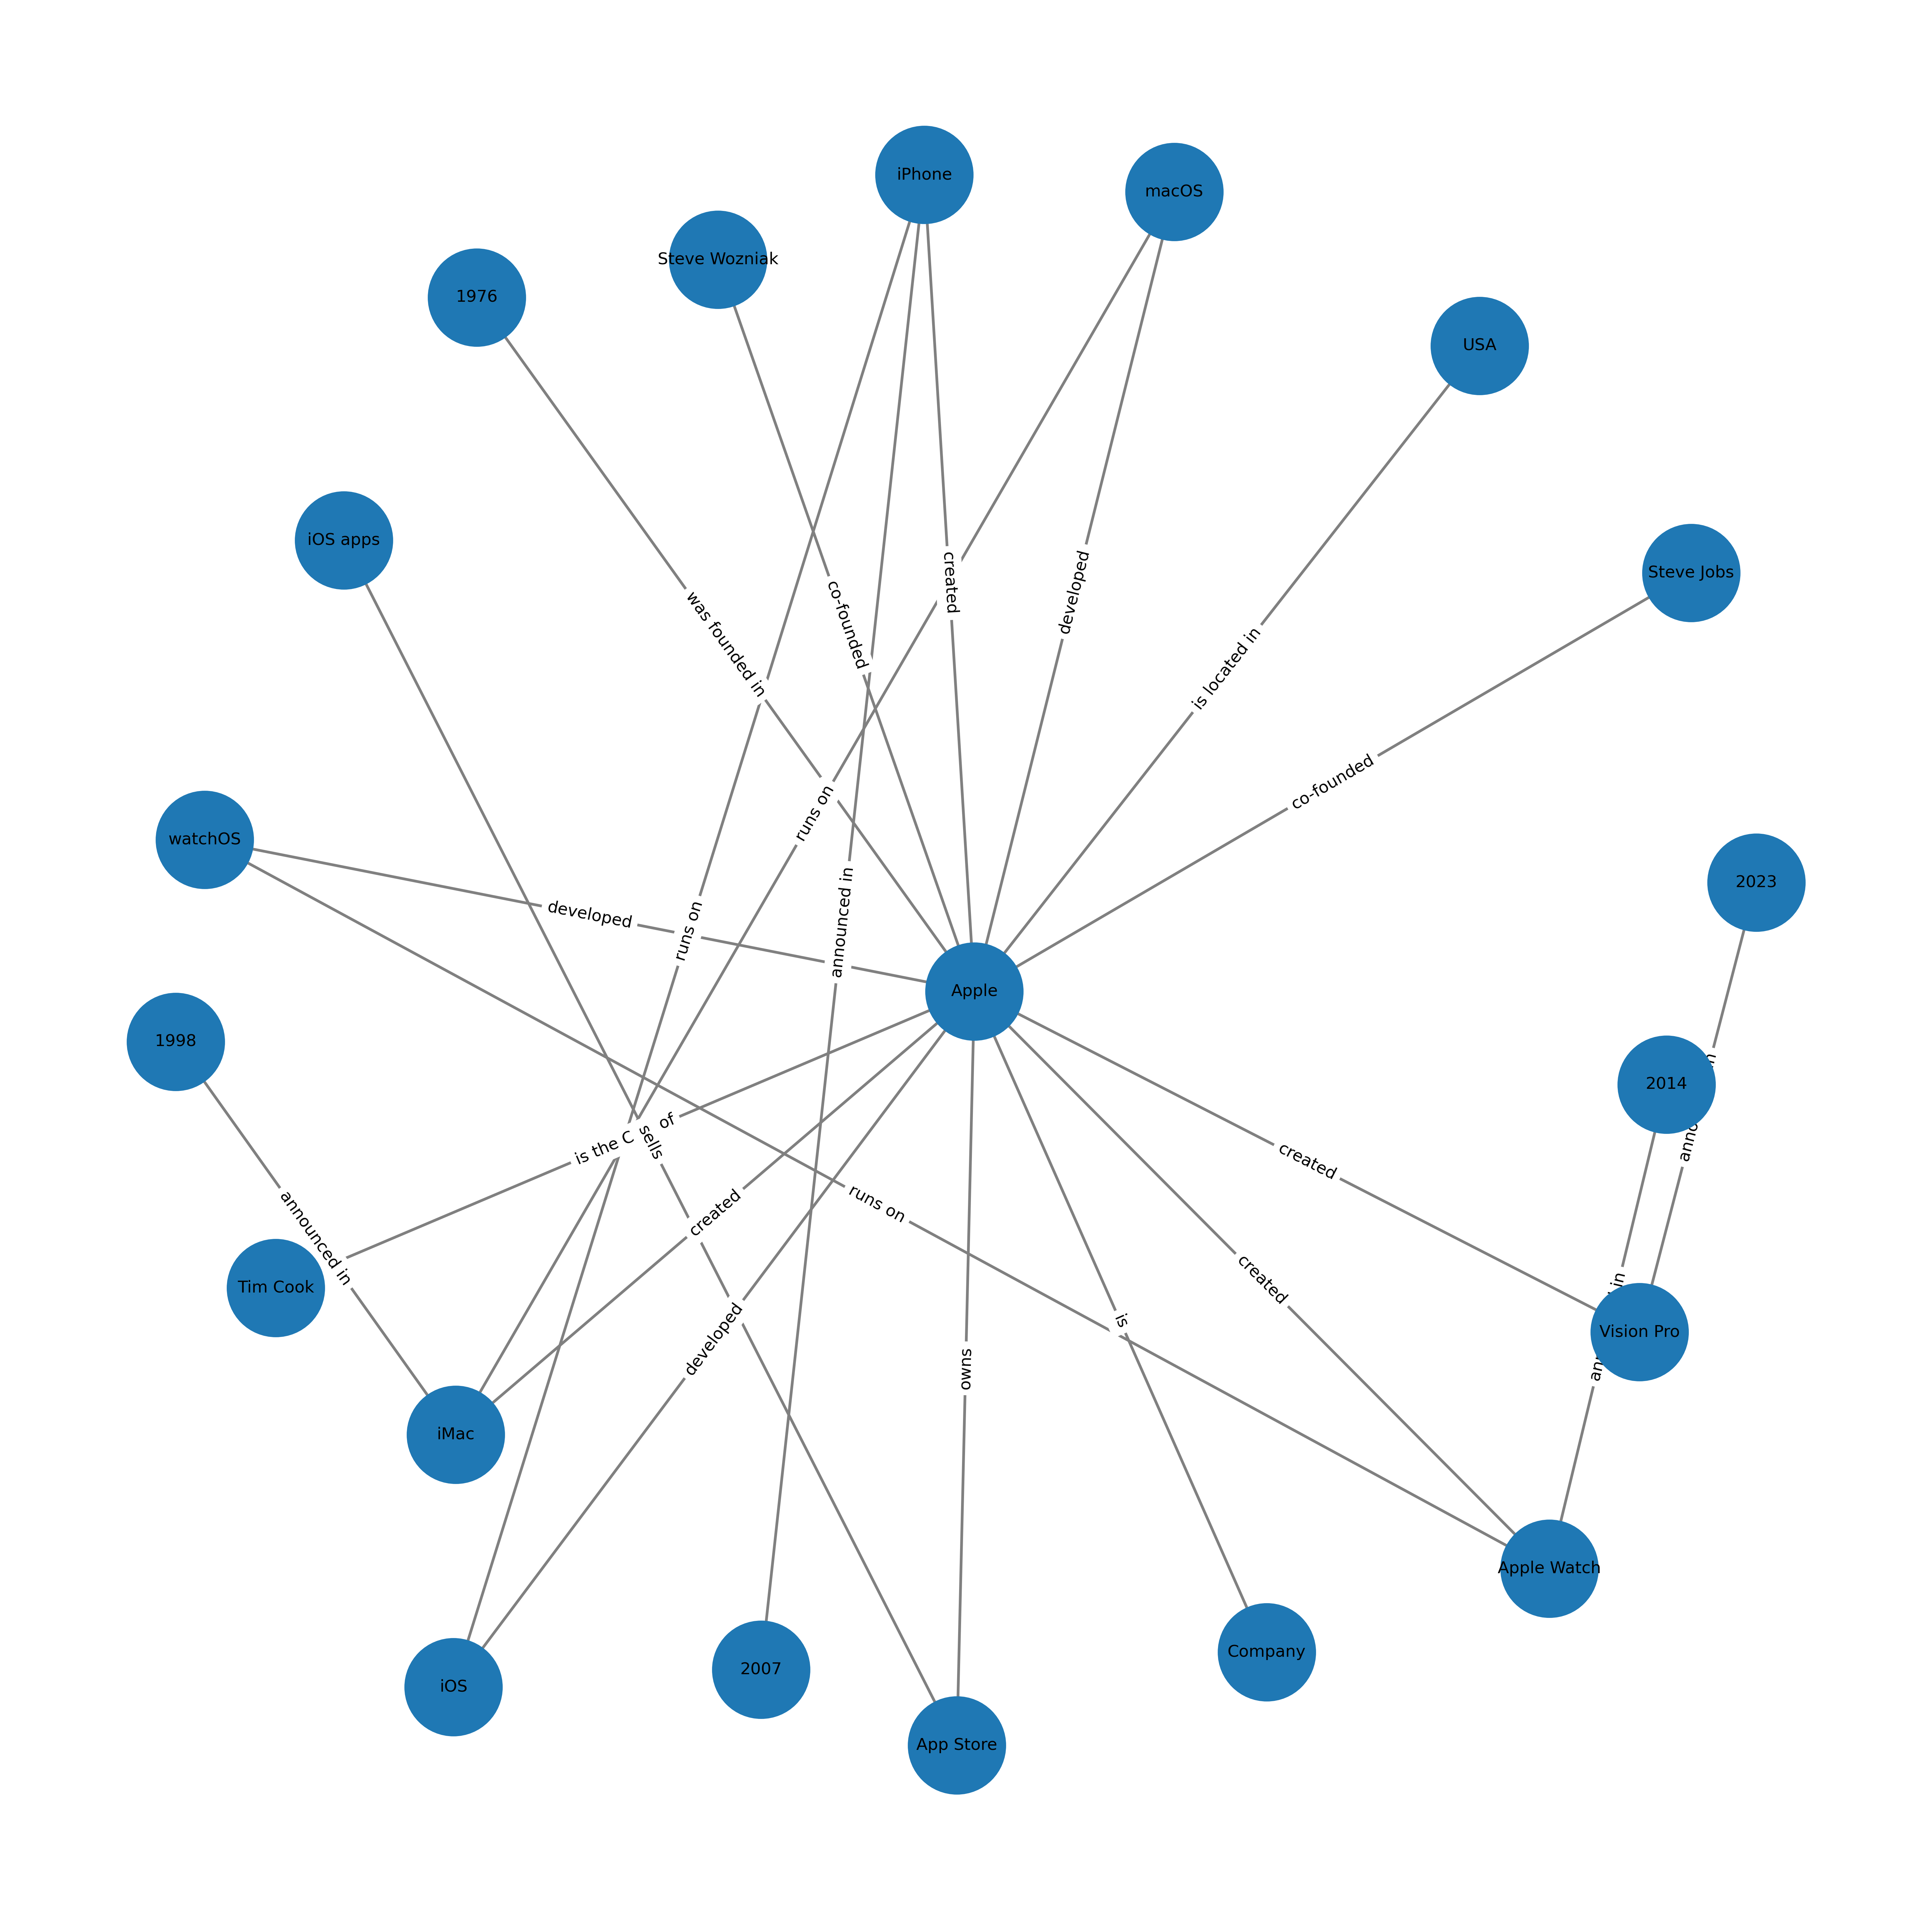

In [ ]:
# Create directed graph
G = nx.DiGraph()
for node1, relation, node2 in kg:
    G.add_edge(node1, node2, label=relation)

# Plot the graph
plt.figure(figsize=(25, 25), dpi=300)
pos = nx.spring_layout(G, k=2, iterations=50, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=5000)
nx.draw_networkx_edges(G, pos, edge_color='gray', edgelist=G.edges(), width=2)
nx.draw_networkx_labels(G, pos, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Display the plot
plt.axis('off')
plt.show()

In [ ]:
chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph, verbose=True)
chain.run(question)



> Entering new GraphQAChain chain...
Entities Extracted:
 Apple, Vision Pro
Full Context:
Apple is Company
Apple created iMac
Apple created iPhone
Apple created Apple Watch
Apple created Vision Pro
Apple developed macOS
Apple developed iOS
Apple developed watchOS
Apple is located in USA
Apple was founded in 1976
Apple owns App StoreVision Pro announced in 2023

> Finished chain.


' Apple announced the Vision Pro in 2023.'